# Simple Linear Regression

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1/ Dataset

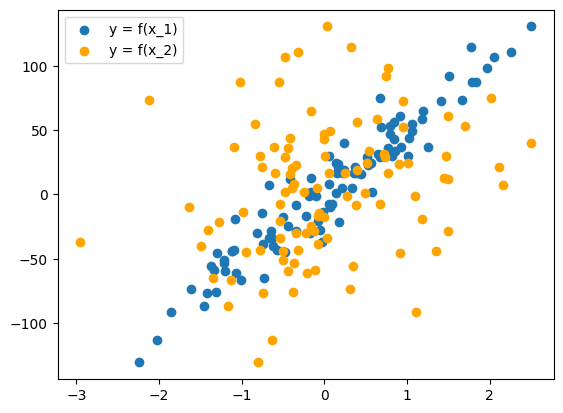

In [2]:
m, n = 100, 2
x, y = make_regression(n_samples=m, n_features=n, noise=10)
plt.scatter(x[:, 0], y, label='y = f(x_1)')
plt.scatter(x[:, 1], y, c='orange', label="y = f(x_2)")
plt.legend()

In [3]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [4]:
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


In [5]:
# X matrix
X = np.hstack((x, np.ones(x[:, 0].shape + (1,))))
print(X)

[[ 1.62906575e-01  8.99206694e-01  1.00000000e+00]
 [ 2.16929278e-01 -3.95912706e-01  1.00000000e+00]
 [-1.84928800e+00  1.11129527e+00  1.00000000e+00]
 [ 2.05176906e+00 -4.72012771e-01  1.00000000e+00]
 [ 1.39134498e-01  4.87635299e-01  1.00000000e+00]
 [-1.33532890e+00 -1.14371206e-01  1.00000000e+00]
 [ 1.06686792e+00  6.66967317e-02  1.00000000e+00]
 [ 2.25803275e+00 -3.12459567e-01  1.00000000e+00]
 [ 1.48123330e-01  1.01559268e+00  1.00000000e+00]
 [-3.41846590e-01  3.85855384e-01  1.00000000e+00]
 [-1.00445299e-01  2.74030292e-01  1.00000000e+00]
 [ 1.78656678e+00 -5.43194737e-01  1.00000000e+00]
 [-6.16812343e-01 -1.48601728e+00  1.00000000e+00]
 [-1.01119245e+00 -1.13126786e+00  1.00000000e+00]
 [ 6.71471575e-01  2.01707406e+00  1.00000000e+00]
 [ 1.02539577e+00 -4.17714315e-01  1.00000000e+00]
 [-6.27819988e-01 -5.34033655e-01  1.00000000e+00]
 [-1.20214434e+00 -4.39350016e-01  1.00000000e+00]
 [-2.02353207e+00 -6.32927478e-01  1.00000000e+00]
 [ 6.44997341e-01  7.23752018e-

In [6]:
theta = np.random.randn(3, 1)
print(theta.shape)
print(theta)

(3, 1)
[[-1.48029786]
 [-1.04451582]
 [ 0.03124634]]


## Model

In [7]:
def model(X, theta):
    return X.dot(theta)

In [8]:
Y = model(X, theta)
print(Y)

[[-1.14913953]
 [ 0.12366348]
 [ 1.60797791]
 [-2.51295819]
 [-0.68405694]
 [ 2.12739338]
 [-1.61770175]
 [-2.98494573]
 [-1.24882293]
 [ 0.13424906]
 [-0.10629367]
 [-2.04602913]
 [ 2.49648089]
 [ 2.70973954]
 [-3.06959736]
 [-1.0503356 ]
 [ 1.51841353]
 [ 2.26968607]
 [ 3.68777929]
 [-1.67951227]
 [-2.89652848]
 [-0.33344326]
 [-1.14960946]
 [ 0.65591161]
 [-1.24329675]
 [ 1.21243076]
 [-1.72297927]
 [-0.69744445]
 [-0.37351519]
 [-0.82956786]
 [ 2.36372227]
 [ 1.20576342]
 [ 2.19788217]
 [ 0.85461548]
 [ 0.40419518]
 [ 4.19368098]
 [ 1.07968116]
 [-1.22437333]
 [ 0.2687856 ]
 [ 3.40641079]
 [-0.18884973]
 [-0.22656683]
 [-0.57263286]
 [-1.58783542]
 [ 0.98065641]
 [-1.9824981 ]
 [ 1.57780203]
 [-1.33327371]
 [ 2.90565253]
 [-1.62480983]
 [-0.57331508]
 [-1.80564522]
 [-1.56767044]
 [ 1.477864  ]
 [ 0.32463744]
 [ 0.27546794]
 [-3.69847114]
 [ 2.46347154]
 [ 1.8189838 ]
 [-0.39267755]
 [-0.72430758]
 [ 1.69426128]
 [ 0.17672876]
 [ 0.51485815]
 [ 0.45936073]
 [ 3.15713122]
 [-2.98996

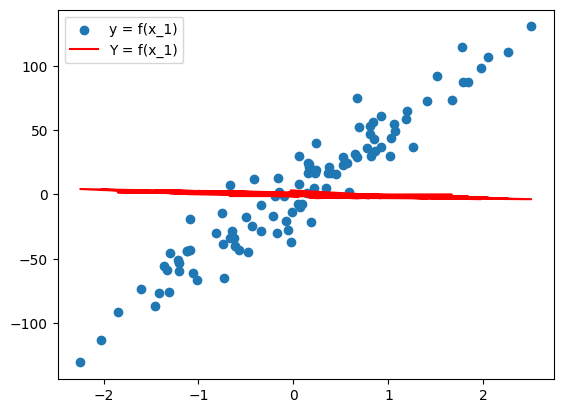

In [9]:
plt.scatter(x[:, 0], y, label='y = f(x_1)')
plt.plot(x[:, 0], Y, c='red', label='Y = f(x_1)')
plt.legend()

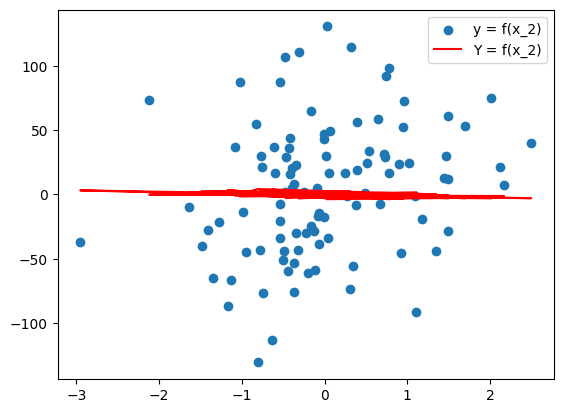

In [10]:
plt.scatter(x[:, 1], y, label="y = f(x_2)")
plt.plot(x[:, 1], Y, c='red', label='Y = f(x_2)')
plt.legend()

In [11]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [12]:
cost_function(X, y, theta)

1432.7970011328596

In [13]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [14]:
def gradient_descent(X, y, theta, learn_rate, n_iter):
    cost_history = np.zeros(n_iter)
    for i in range(0, n_iter):
        theta = theta - learn_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

In [15]:
n_iter = 1000
theta_final, cost_history = gradient_descent(X, y, theta, learn_rate=0.01, n_iter=n_iter)
print(theta_final)

[[49.38870138]
 [11.74747732]
 [ 0.73759635]]


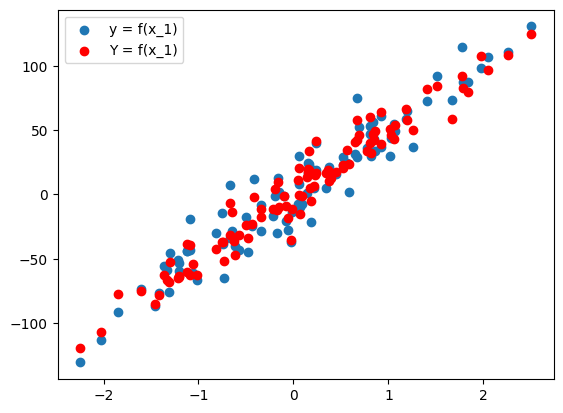

In [16]:
predictions = model(X, theta_final)

plt.scatter(x[:, 0], y, label="y = f(x_1)")
plt.scatter(x[:, 0], predictions, c='red', label='Y = f(x_1)')
plt.legend()

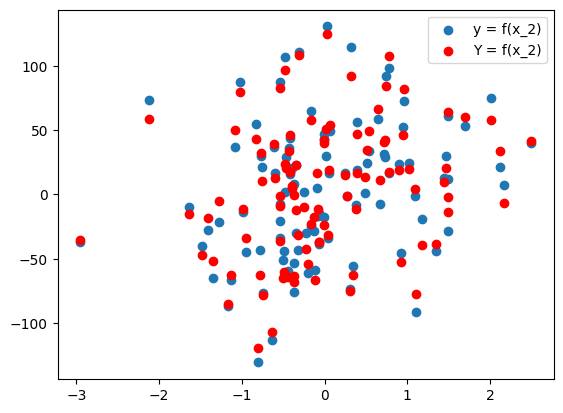

In [17]:
plt.scatter(x[:, 1], y, label="y = f(x_2)")
plt.scatter(x[:, 1], predictions, c='red', label='Y = f(x_2)')
plt.legend()

## Courbe d'apprentissage

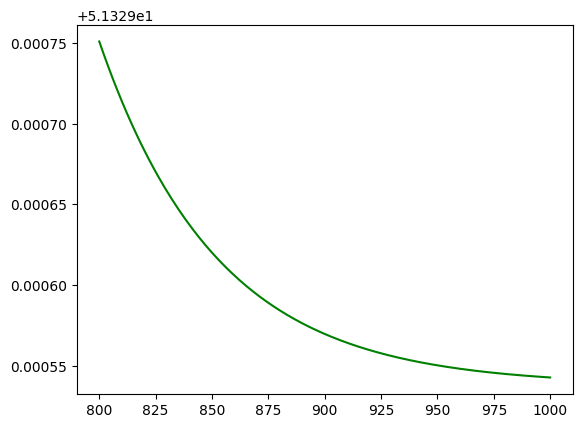

In [18]:
plt.plot(np.arange(800, n_iter+1), cost_history[799:], c='green')

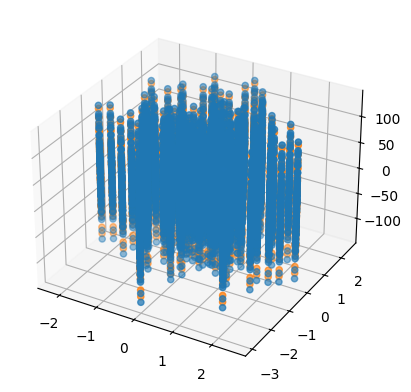

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib notebook # For interactivity, but doesn't work in vs code
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], y)
ax.scatter(x[:, 0], x[:, 1], predictions)
plt.show()

## Coefficient de détermination

In [20]:
def determ_coef(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

r = determ_coef(y, predictions)
print(r)

0.9616053574738481
